In [1]:
# Imports
import time
import sys
import math
from dataclasses import dataclass
from random import randint
import asyncio

from IPython.display import clear_output
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
from pyapriltags import Detector


from unitree_sdk2py.core.channel import ChannelSubscriber, ChannelFactoryInitialize
from unitree_sdk2py.idl.default import unitree_go_msg_dds__SportModeState_
from unitree_sdk2py.idl.unitree_go.msg.dds_ import SportModeState_
from unitree_sdk2py.go2.video.video_client import VideoClient
from unitree_sdk2py.go2.sport.sport_client import (
    SportClient,
    PathPoint,
    SPORT_PATH_POINT_SIZE,
)
from unitree_sdk2py.go2.obstacles_avoid.obstacles_avoid_client import ObstaclesAvoidClient
from IPython.display import Image
%matplotlib inline

In [2]:
# setup for add on camera
ChannelFactoryInitialize(0, "eth0")
# ChannelFactoryInitialize()

sport_client = SportClient()  
sport_client.SetTimeout(10.0)
sport_client.Init()

obsclient = ObstaclesAvoidClient()
obsclient.SetTimeout(3.0)
obsclient.Init()

# setup for default camera
client = VideoClient()
client.SetTimeout(1.0)
client.Init()


In [3]:
at_detector = Detector(families='tag25h9 tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

In [4]:
def detect_tag_from_main_camera():
    # feed from default camera
    code,data = client.GetImageSample()
    img_1 = np.frombuffer(bytes(data), dtype=np.uint8)
    image_1 = cv2.imdecode(img_1, cv2.IMREAD_COLOR)
    image_1_gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
    clear_output(wait=True)
    plt.imshow(image_1_gray, cmap="gray")
    plt.show()
    tags = at_detector.detect(image_1_gray)
    return [t.tag_id for t in tags]
    

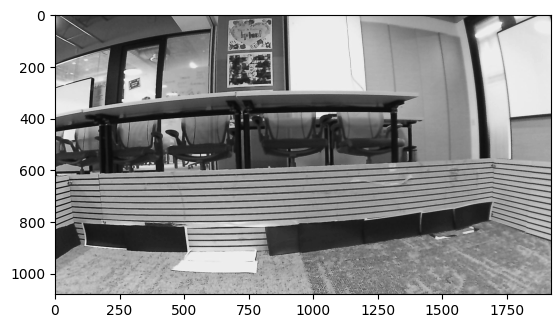

[]

In [5]:
detect_tag_from_main_camera()

In [7]:
 while True:
    tags_2 = detect_tag_from_main_camera()
    if len(tags_2) > 0:
        print(sorted(tags_2))
        # break

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [9]:
stop_move()

In [11]:
# initialize the known distance from the camera to the object, which
# in this case is 24 inches
KNOWN_DISTANCE = 27.5
# initialize the known object width, which in this case, the piece of
# paper is 12 inches wide
KNOWN_WIDTH = 4.5
focalLength = 1158.517693413629
# load the first image that contains an object that is KNOWN TO BE 2 feet
# from our camera, then find the paper marker in the image, and initialize
# the focal length
# focalLength = ((tag.corners[1][0]-tag.corners[0][0]) * KNOWN_DISTANCE) / KNOWN_WIDTH

In [12]:
def distance_to_camera(knownWidth, focalLength, perWidth):
	# compute and return the distance from the maker to the camera
	return (knownWidth * focalLength) / perWidth

In [13]:
while True:
    clear_output(wait=True)
    code,data = client.GetImageSample()
    img_1 = np.frombuffer(bytes(data), dtype=np.uint8)
    image_1 = cv2.imdecode(img_1, cv2.IMREAD_COLOR)
    image_1_gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
    clear_output(wait=True)
    # plt.imshow(image_1_gray, cmap="gray")
    # plt.show()
    tags = at_detector.detect(image_1_gray)
    if tags:
        tag = tags[0]
        # print(type(image_1_gray), tag, (tag.corners[1][0], tag.corners[1][1]), (tag.corners[3][0], tag.corners[3][1]))
        rect_image = cv2.rectangle(image_1_gray, (int(tag.corners[3][0]), int(tag.corners[3][1])), (int(tag.corners[1][0]), int(tag.corners[1][1])), (255, 0, 0), 2)
        plt.imshow(rect_image, cmap="gray")
        plt.show()
        print(distance_to_camera(4.5, focalLength, (tag.corners[1][0]-tag.corners[0][0])))
    time.sleep(1)

KeyboardInterrupt: 

In [57]:
markers

((964.5, 959.0), (190.0, 209.0), 90.0)

In [10]:
distance_to_camera(4.5, focalLength, (tag.corners[1][0]-tag.corners[0][0]))

37.72604215113264